In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
url = 'https://onetwork.org/dataset/1_Simple_linear_regression.csv'
df = pd.read_csv(url)

In [4]:
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
95,1934,3.54
96,1861,3.58
97,1931,3.58
98,1933,3.59


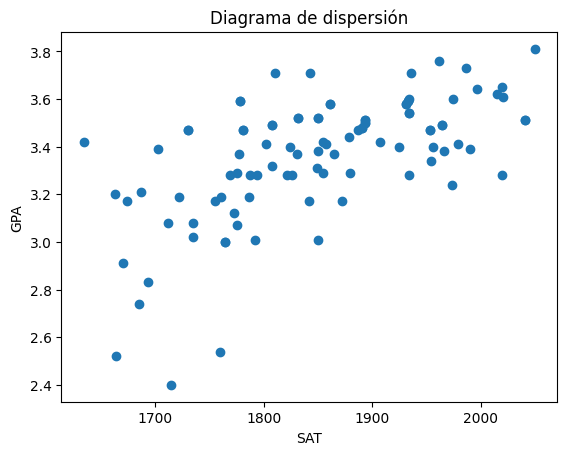

In [5]:
# Ploteo los datos
plt.scatter(df['SAT'], df['GPA'])
# Etiquetar el grafico
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Diagrama de dispersión')
# Show the plot
plt.show()

In [7]:
# Defino los datos de x como la primera columna y los datos de y como la segunda columna
x = df['SAT']
y = df['GPA']

In [8]:
# Genero una linea para la regresion, ingresando datos manuales.
# Definimos manualmente los valores de m y b para obtener una regresion lineal
m = 0.003  # Slope
b = 2  # Intercept

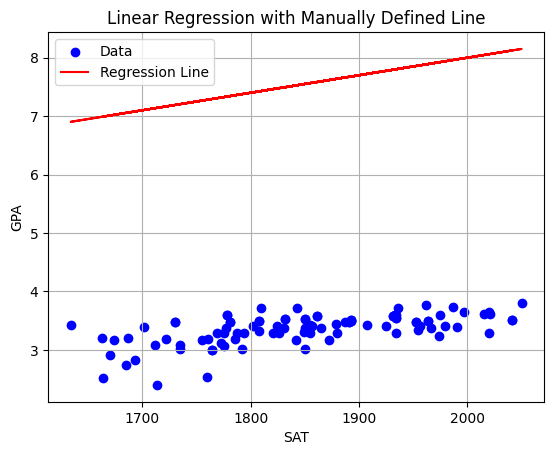

In [9]:
# generando datos predichos para graficar la linea de regresion
y_pred = m * x + b

# Grafico los datos y la linea de regresion
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Linear Regression with Manually Defined Line')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Arreglo en los datos por ser una sola columna
x = np.array(x).reshape(-1, 1)

In [11]:
# Se divide los datos en train y test con scikit learn
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

## Modelo de Regresion lineal simple

In [12]:
# Aplicamos la regresion lineal
from sklearn.linear_model import LinearRegression
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Realizamos la prediccion
y_pred = model.predict(X_test)

In [15]:
y_pred

array([3.6621196 , 3.04524281, 3.488623  , 3.47675999, 3.57314699,
       3.33736956, 3.08824624, 3.30622914, 3.19501338, 3.16387296,
       3.35368121, 3.24543119, 3.49010588, 3.37295861, 3.42930793,
       3.13273255, 3.58352713, 3.6176333 , 3.19501338, 3.49010588])

In [16]:
# Importamos la libreria de metricas
from sklearn import metrics

In [17]:
# Información del modelo
print("Intercept:", model.intercept_)

Intercept: 0.6222219309814476


In [18]:
# calculamos el r2
print('r2:', metrics.r2_score(y_test, y_pred))

r2: 0.41688865120062324


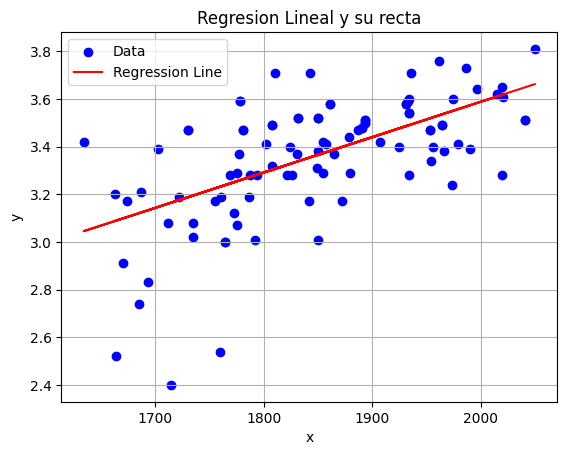

In [19]:
# Grafico los datos y la linea de regresion
plt.scatter(x, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion Lineal y su recta')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     42.17
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           7.11e-09
Time:                        09:29:32   Log-Likelihood:                 18.638
No. Observations:                  80   AIC:                            -33.28
Df Residuals:                      78   BIC:                            -28.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6222      0.423      1.470      0.1